In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_ff_1.csv', sep = ';')

df['age_group'] = pd.cut(df['age'], bins = range(0, 90, 5), right = True) # Столбец групп с возрастами

ans = df.groupby('age_group')['share_tap_flg'].sum().idxmax() #Группируем по возрасту и считаем репосты
print("Ответ:" + str(ans) + "; " + str(df.groupby('age_group')['share_tap_flg'].sum().max()))

Ответ:(30, 35]; 245


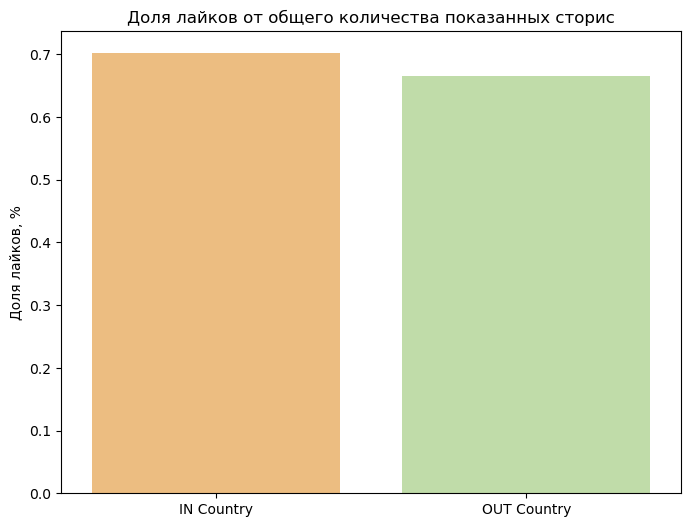

 Ответ: in_country; 0.702


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_ff_1.csv', sep = ';')

in_country = df[df['geo_country'] == 'RU'] #группа внутри страны
out_country = df[df['geo_country'] != 'RU'] #группа за пределами страны

like_in_country = in_country['like_tap_flg'].sum() # лайки и cторис для тех кто В стране
story_in_country = in_country['prosmotr'].sum()

like_out_country = out_country['like_tap_flg'].sum() # лайки и сторис для тех кто ВНЕ страны
story_out_country = out_country['prosmotr'].sum()

share_in_country = (like_in_country / story_in_country) * 100  #Доля лайков от сторис В стране
share_out_country = (like_out_country / story_out_country) * 100 #Доля лайков от сторис ВНЕ страны

# визуализация
labels = ['IN Country', 'OUT Country']
share = [share_in_country, share_out_country]
plt.figure(figsize=(8, 6))
sns.barplot(x = labels, y = share, palette = 'Spectral')
plt.title('Доля лайков от общего количества показанных сторис')
plt.ylabel('Доля лайков, %')
plt.show()

result = "in_country" if share_in_country > share_out_country else "out_country"  
print(f" Ответ: {result}; {share_in_country:.3f}") #ОТВЕТ

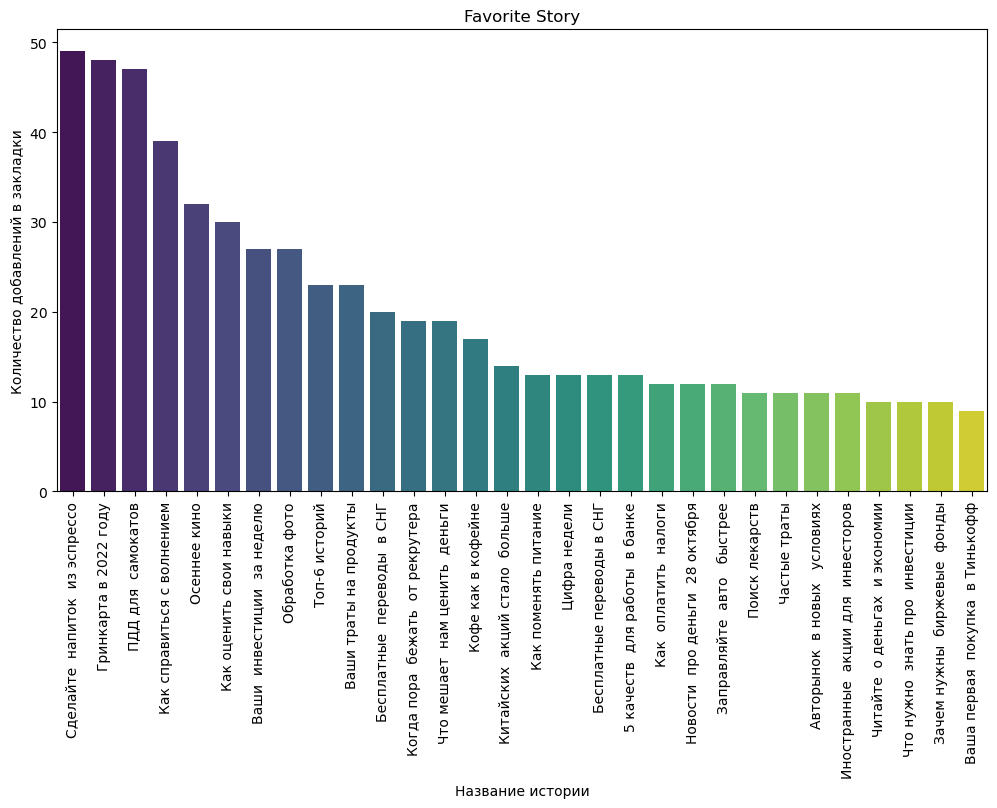

Наибольшая конверсия у истории: Сделайте  напиток  из эспрессо


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_ff_1.csv', sep=';')

# группировка по названию истории и показам
stories = df.groupby('name').agg({
    'prosmotr': 'sum',
    'favorite_tap_flg': 'sum',
}).reset_index()

all_story = stories[stories['prosmotr'] > 100] # сторис, которые показаны более 100 раз

fave_story = all_story.sort_values(by = 'favorite_tap_flg', ascending = False).head(30)

# визуализация данных
plt.figure(figsize=(12, 6))
sns.barplot(x = 'name', y = 'favorite_tap_flg', data = fave_story, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Favorite Story')
plt.xlabel('Название истории')
plt.ylabel('Количество добавлений в закладки')
plt.show()

best_story = fave_story.iloc[0]['name'] #история с наибольшей конверсией в "любимые"
print(f"Наибольшая конверсия у истории: {best_story}")


    geo_region     geo_city_max geo_city_min  view_difference
184        MOW           Москва       Троицк           125702
235        SPE  Санкт-Петербург  Зеленогорск            53301
240        SVE     Екатеринбург       Мартюш            20177


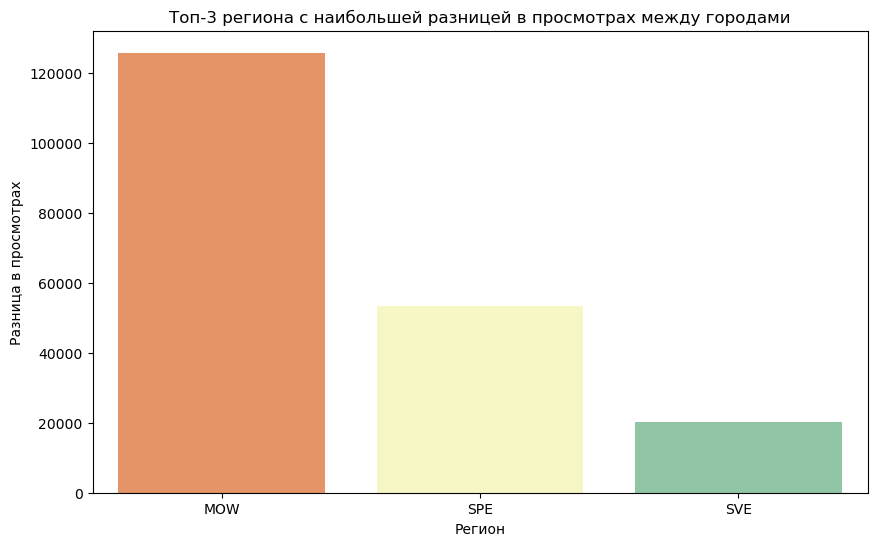

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_ff_1.csv', sep = ';')

regions = df.groupby(['geo_region', 'geo_city'])['prosmotr'].sum().reset_index() #группируем по региону и городу  +сумма просмотров

max_in_city = regions.loc[regions.groupby('geo_region')['prosmotr'].idxmax()] #город с максимальным числом просмотров 
min_in_city = regions.loc[regions.groupby('geo_region')['prosmotr'].idxmin()] #город с минимальным числом просмотров

views = pd.merge(max_in_city, min_in_city, on = 'geo_region', suffixes = ('_max', '_min'))

views['view_difference'] = views['prosmotr_max'] - views['prosmotr_min'] # разница в просмотрах между городами

sort_views = views.sort_values(by = 'view_difference', ascending = False) # сортировка по убыванию

ans_regions = sort_views[['geo_region', 'geo_city_max', 'geo_city_min', 'view_difference']].head(3) #ОТВЕТ
print(ans_regions)

# визуализация 
plt.figure(figsize = (10, 6))
sns.barplot(x = 'geo_region', y = 'view_difference', data = ans_regions, palette = 'Spectral')
plt.title('Топ-3 региона с наибольшей разницей в просмотрах между городами')
plt.xlabel('Регион')
plt.ylabel('Разница в просмотрах')
plt.show()




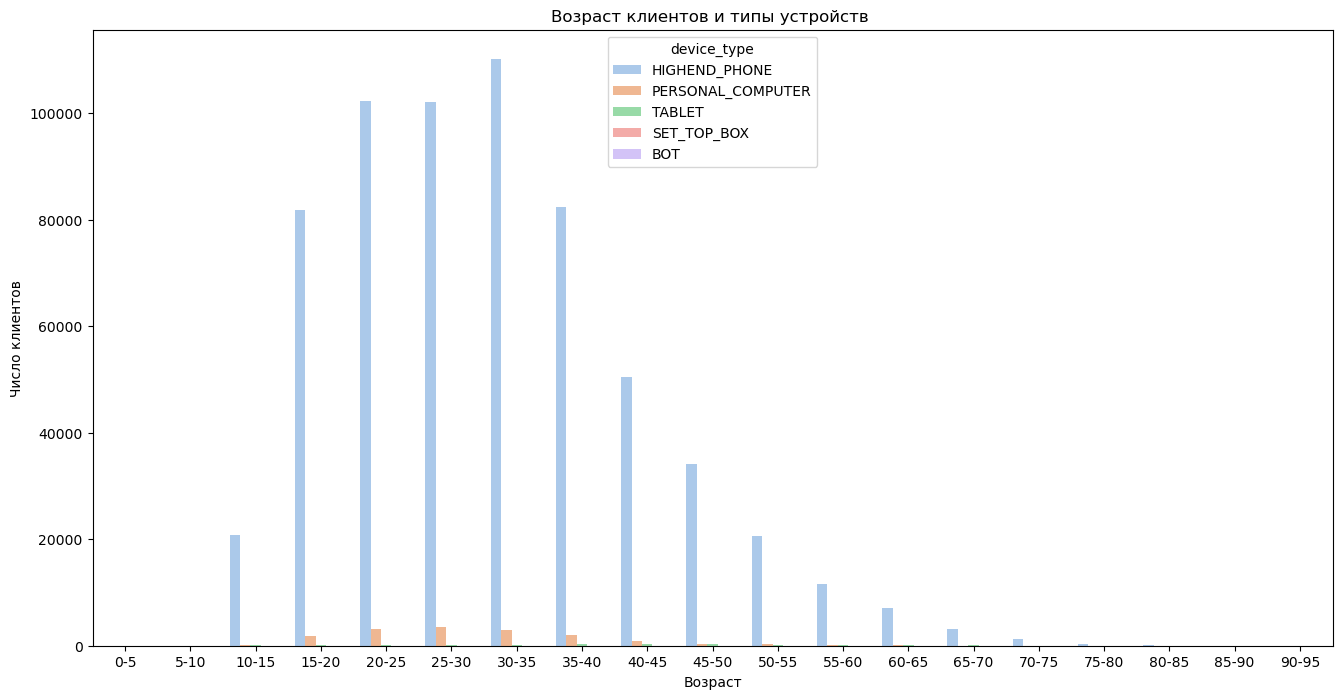

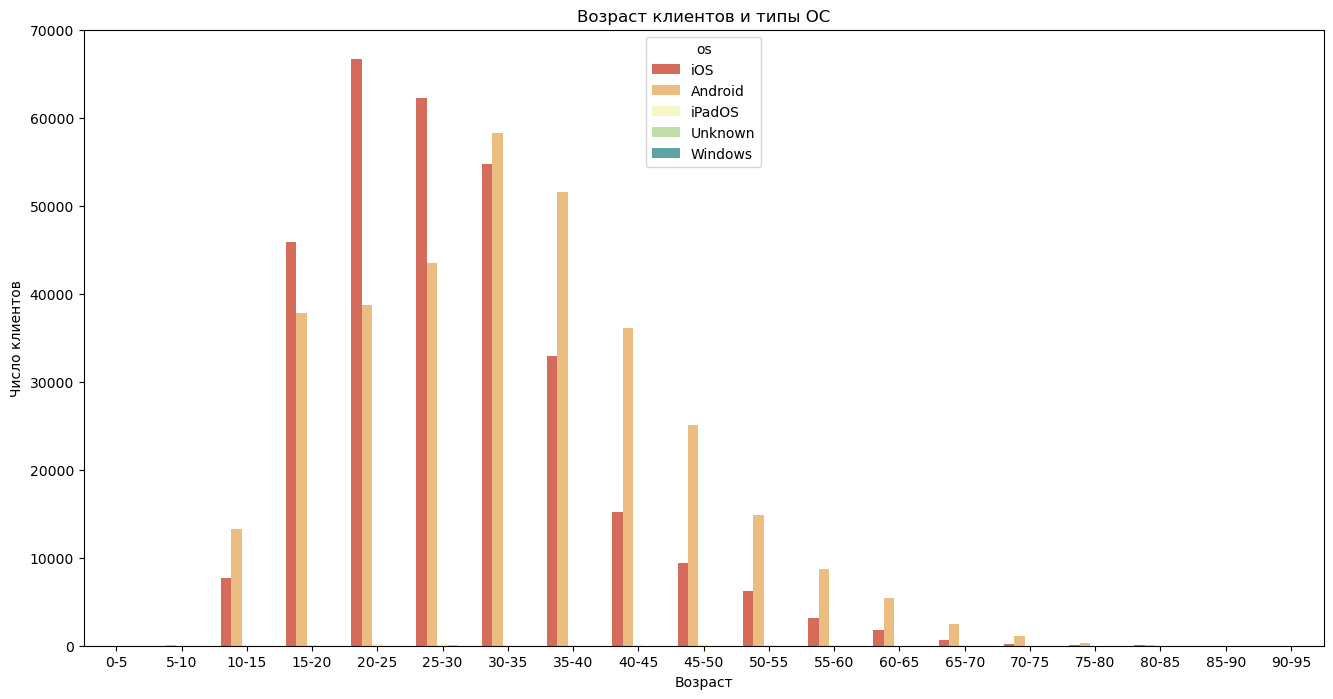

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_ff_1.csv', sep = ';')

df2 = df[['age', 'device_type', 'os']]

#распределение и визуализация
plt.figure(figsize = (16, 8))
sns.countplot(x = pd.cut(df2['age'], bins = range(0, 100, 5), right = True, labels = [f"{i}-{i+5}" for i in range(0, 95, 5)]),
              hue = 'device_type', data = df2, palette = 'pastel')
plt.title('Возраст клиентов и типы устройств ')
plt.xlabel('Возраст')
plt.ylabel('Число клиентов')
plt.show()

plt.figure(figsize = (16, 8))
sns.countplot(x = pd.cut(df2['age'], bins = range(0, 100, 5), right = True, labels = [f"{i}-{i+5}" for i in range(0, 95, 5)]),
              hue = 'os', data = df2, palette = 'Spectral')
plt.title('Возраст клиентов и типы ОС')
plt.xlabel('Возраст')
plt.ylabel('Число клиентов')
plt.show()

In [ ]:
Ответ по 5ому заданию: 
Практически все пользователи пользуются приложением с телефона, совсем немногие предпоочитают заходить с
персонального компьютера(больше всего им пользуются клиенты 25-30 лет.
Если говорить о операционных системах, среди подростков наиболее распространена операционная система Android,
но затем наблюдается явная тенденция к использованию iOS, особенно до 30 лет. После этого возраста снова становится популярной Android,
а количество пользователей iPadOS, неизвестной операционной системы или Windows по сравнению с лидерами явно невелико.